# <u>Case Study 13</u>: Analysis of Variance (ANOVA)

This Case Study contains analyses to answer the question:

Is there an association or relationship between age and political affiliation?

The approach used to address these questions can be thought of in two different ways:

- As an extension of the inference procedures for two population means ($\mu_1 - \mu_2$) to more than two populations
- As a special case of linear regression models when there is one categorical explanatory variable

Our goal is to determine if the **mean response** is significantly different between categories of the explanatory variable, where the variable can take more than two values.

The specific benefit of ANOVA is that we can compare 2 or more populations at the same time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Preparing Our Data

Let's again examine our random sample of adults living in the U.S. (from 2017) from Pew Research.

In [2]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
pew = pd.read_csv('Feb17public.csv', 
                   na_values=missing_values)[['age', 'party']].dropna()
pew.head()

,age,party
0,80.0,Independent
1,70.0,Democrat
2,69.0,Independent
3,50.0,Republican
4,70.0,Democrat


In [3]:
pew.shape

(1465, 2)

How many of each political affiliation are there in this sample?

In [4]:
pew['party'].value_counts()

Democrat                527
Independent             525
Republican              367
No preference (VOL.)     41
Other party (VOL.)        5
Name: party, dtype: int64

Let's rename the party categories so they are easier to label in graphs. We can do this as follows.

In [5]:
# rename categories so they display better
party = pd.Categorical(pew['party'])
party.rename_categories({'Democrat': 'Dem', 
                         'Independent': 'Ind', 
                         'Republican': 'Rep',
                         'No preference (VOL.)': 'No_Pref',
                         'Other party (VOL.)': 'Other'
                        }, inplace=True)
pew['party']=party

In [6]:
pew['party'].value_counts()

Dem        527
Ind        525
Rep        367
No_Pref     41
Other        5
Name: party, dtype: int64

Next, let's fit our multiple linear regression model for the sample, where age is our response variable and party is our explanatory variable.

In [7]:
agemod = smf.ols('age ~ party', data=pew).fit()
agemod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.82
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           6.66e-16
Time:                        17:29:42   Log-Likelihood:                -6261.1
No. Observations:                1465   AIC:                         1.253e+04
Df Residuals:                    1460   BIC:                         1.256e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           50.4991      0.758     66.618      0.000      49.012      51.986
party[T.Ind]        -3.6914      1.073     -3.440      0.001      -5.796      -1.587
party[T.No_Pref]    -7.3527      2.821     -2.606      0.009     -12.887      -1.818
party[T.Other]      -5.8991      7.819     -0.754      0.451     -21.237       9.439
party[T.Rep]         6.2775      1.183      5.306      0.000       3.957       8.598
==============================================================================
Omnibus:                      130.613   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.798
Skew:                          -0.017   Prob(JB):                     1.38e-09
Kurtosis:                       2.183   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary Characteristics for the Sample

**Is there an association between party and age *in this sample*?** Let's use descriptive analytics to find out.

### Visualization
With several groups we can use side by side boxplots to visualize the age distributions.

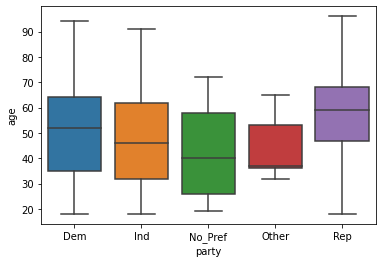

In [8]:
sns.boxplot(x='party', y='age', data=pew)
plt.show()

The median age across the five different political affiliation groups is different, so we can say that there is at least some association *in the sample* between political affiliation and age.

### Summary statistics

Using Pandas **groupby()** function to get summary statistics for each political affiliation

In [9]:
# within group means
pew.groupby('party').mean()

,age
party,
Dem,50.499051
Ind,46.807619
No_Pref,43.146341
Other,44.600000
Rep,56.776567


In [10]:
# within group sample standard deviations
pew.groupby('party').std()

,age
party,
Dem,17.687279
Ind,17.517144
No_Pref,17.062475
Other,13.939153
Rep,16.885801


In [11]:
# within group sample sizes
pew.groupby('party').count()

,age
party,
Dem,527
Ind,525
No_Pref,41
Other,5
Rep,367


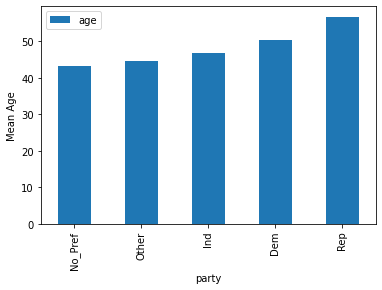

In [12]:
pew.groupby('party').mean().sort_values(by='age').plot.bar()
plt.ylabel('Mean Age')
plt.show()

## Inference for our Linear Model

**Does it seem reasonable that there is an association between a categorical explanatory variable (with 2 or more levels) and a quantitative response variable *for the population*?**

Now let’s think about what the multiple linear regression equation would look like if we modelled the relationship between age (response variable) and political affiliation (explanatory variable) in the population of all adults living in the U.S. 

$\hat{age}=\beta_0+\beta_1 party[T.Ind]+\beta_2 party[T.Ind]+\beta_3 party[T.No pref]+\beta_4 party[T.Rep]$

### Significance of Regression Test

**Do we have sufficient evidence to suggest that at least one of the four population slopes is non-zero?**

This sounds like our significance of regression test.

1. First let’s formulate the hypotheses.

$H_0: \beta_1=\beta_2=\beta_3=\beta_4=0$

$H_A:$ At least one $\beta_i\neq0$ (for i=1,2,3,4)

2. Next, let’s check the conditions for conducting inference.

a.) <u>Linearity Condition</u>

It appears that there is an even distribution of points above and below the line in the fitted values vs. residuals plot as we move from left to right. So we can say that this condition is met.


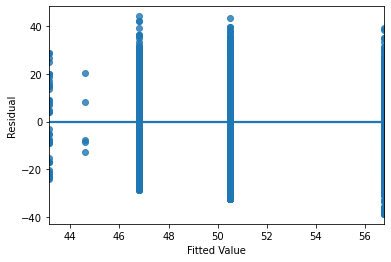

In [13]:
sns.regplot(x=agemod.fittedvalues, y=agemod.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

b.) <u>Constant Variance of Residuals Condition</u>

It appears that the spread of the residuals (ie. the y-axis spread) in the fitted values vs. residuals plot changes as we move from left to right. So we cannot say that this condition is met.

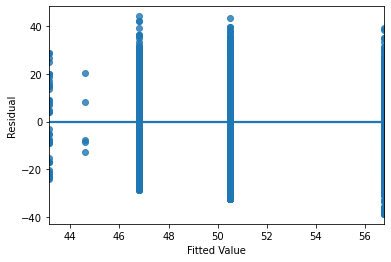

In [14]:
sns.regplot(x=agemod.fittedvalues, y=agemod.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

c.) <u>Normality of Residuals (with Mean 0) Condition</u>

It appears that the residuals are slightly skewed to the right. So because the histogram of residuals is not quite symmetric and unimodal, this condition is somewhat not met.

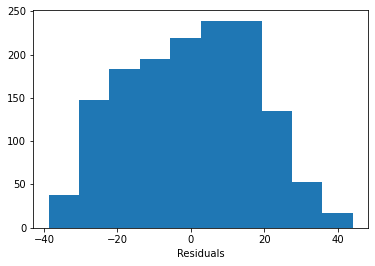

In [15]:
plt.hist(agemod.resid)
plt.xlabel('Residuals')
plt.show()

d.) <u>Independence of Residuals Condition</u>

While we cannot know for sure if this condition is met (using the methods that we know so far in this class), we know that this condition will NOT be met if the sample is not random or $n\geq 10$% of the population.

But, we do know that:
* this sample is random and 
* $n=1465<10$% of all adults living in the U.S..

So this tells us that this condition is not violated *in this particular way*.

<u>e.) No Multicollinearity Condition</u>

This linear regression model involves only one explanatory variable and it is categorical, so we do not need to check this condition.

**So not all of the conditions for conducting inference on a population slope or intercept are quite met**. Thus some of the conclusions that we make about our hypotheses may be slightly off, but we will proceed with caution with that in mind.

3. Find the test statistic and the *p*-value that correspond to these hypotheses.

In [16]:
agemod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.82
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           6.66e-16
Time:                        17:29:43   Log-Likelihood:                -6261.1
No. Observations:                1465   AIC:                         1.253e+04
Df Residuals:                    1460   BIC:                         1.256e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           50.4991      0.758     66.618      0.000      49.012      51.986
party[T.Ind]        -3.6914      1.073     -3.440      0.001      -5.796      -1.587
party[T.No_Pref]    -7.3527      2.821     -2.606      0.009     -12.887      -1.818
party[T.Other]      -5.8991      7.819     -0.754      0.451     -21.237       9.439
party[T.Rep]         6.2775      1.183      5.306      0.000       3.957       8.598
==============================================================================
Omnibus:                      130.613   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.798
Skew:                          -0.017   Prob(JB):                     1.38e-09
Kurtosis:                       2.183   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The test statistic for this test is 19.82 and the p-value for this test is $6.66\times 10^{-16}$.

4. Use the p-value (and a significance level of α=0.05) to make a conclusion about your hypotheses.

Because *p*-value$=6.66\times10^{-16}\leq \alpha=0.05$, we reject the null hypothesis. Thus there is sufficient evidence to suggest that at least one of the population slopes in this model is non-zero. 

### Extension of Two Population Means for ANOVA

At the beginning of this Case Study, I mentioned that there are two alternate ways of thinking about ANOVA.  So far, we have described the special case of a regression model.  Now, we will consider how this relates to an extension of the procedures for the difference in two population means.

Recall, our question of interest is **Do we have sufficient evidence to suggest that at least one pair of political affiliations (Democrat, Republican, Independent, No preference, Other party) have average ages out of all adults living in the U.S. that are different?**

1. First let's formulate the hypotheses.

$H_0:\quad \mu_{Dem} = \mu_{Ind} = \mu_{Other} = \mu_{No_Pref}= \mu_{Rep}$

$H_A:$ At least one pair of groups has population mean values that are different from each other.

How does this relate to the previous inference setting?  Let's consider the fitted models for our different levels of political party **for our population**.

$\hat{age}=\beta_0+\beta_1 party[T.Ind]+\beta_2 party[T.Ind]+\beta_3 party[T.No pref]+\beta_4 party[T.Rep]$, where $\hat{age}$ is the expected age for all people with a specific political affiliation.

The baseline level is Democrat.  Therefore $\hat{age}_\text{Dem} = \beta_0 = \mu_{Dem}$.

For another level, say Republican, $\hat{age}_\text{Rep} = \beta_0 + \beta_4 \times party[T.Rep] = \beta_0 + \beta_4 = \mu_{Rep}$.

Therefore, testing if $\beta_4 = 0$ is equivalent to testing if $\mu_{Dem} = \mu_{Rep}$.

With this in mind, the hypotheses are the same and the corresponding test procedures will be the same.

An equivalent conclusion for this hypothesis test is:

Because *p*-value$=6.66\times10^{-16}\leq \alpha=0.05$, we reject the null hypothesis. Thus there is sufficient evidence to at least one pair of <u>population mean ages</u> (out of the five political affiliation groups) <u> are not equal to each other</u>.

---
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign